# Big Data Mart Sales Problem

### Problem statement
#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### Data
    Train data set: 8523

    Test data set: 5681

           

In [155]:
# Import Neccessary Libraries

import pandas as pd
import numpy as np

import matplotlib as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Analysis

In [156]:
# Read  Test Data
test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [157]:
# Read Train Data
train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [158]:
# concatenate two data sets
data = pd.concat([train, test], ignore_index=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [159]:
# Number of rows and coloumns
print("No. of rows and coloumns in test data:", test.shape)
print("No. of rows and coloumns in test data:", train.shape)
print("No. of rows and coloumns in both dataset:", data.shape)

No. of rows and coloumns in test data: (5681, 11)
No. of rows and coloumns in test data: (8523, 12)
No. of rows and coloumns in both dataset: (14204, 12)


In [160]:
# information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [161]:
# information of the test data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


    We can see that data has missing values let's go ahead and count the missing values.

In [162]:
# Missing values in data
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

    There are null values in columns Item_Weight and Outlet_Size of the dataset.

In [163]:
# Describe Data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


    The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.

In [164]:
# unique values
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

    There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups
    There are 10 stores.
    Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.
    There are only 16 Item_Type.

In [165]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# exclude the id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Frequency of Categories f

    1.Low Fat, low fat and LF are all Low Fat; reg and Regular are both Regular.
    2.Maybe combine some of the categories in Outlet_Type -> check the mean sales by type of outlet.
    3.Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.
    
#### Observations on Missing Values
    1.The missing values of the Item_Outlet_Sales come from the test dataset.
    2.The missing values of Item_Weight and Outlet_Size need to be imputed
    3.The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.
    4.Low Fat, low fat and LF are all Low Fat; reg and Regular are both Regular.
#### Observations on Data Analysis to be done
    1.There are 10 stores.
    2.Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.
    3.There are only 16 Item_Type.
    4.Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.
#### Observations on Feature engineering to be done
    1.It might be more helpful to convert the Outlet_Establishment_Years into how old the establishments are.
    2.There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups
    3.Maybe combine some of the categories in Outlet_Type -> check the mean sales by type of outlet.

# Data Imputation

### Item_Weight
Assuming each Item_Identifier identifies a specific item, then it seems reasonable to impute the missing values of the Item_Weight by the average Item_Weight of each Item_Identifier.

To check that we have imputed the values in a reasonable way, we can check the average weight per Outlet_Identifier before and after imputing the missing values.

<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Outlet_Identifier'>

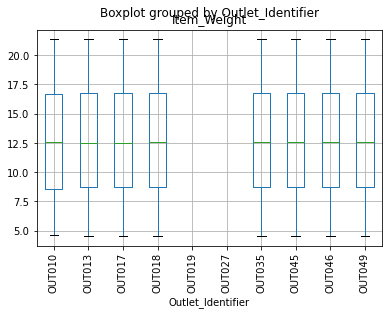

In [166]:
data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)


    This graph shows that the missing weight affects two outlets.

In [167]:
# average weight per item
item_av_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_av_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


Text(0.5, 1.0, '')

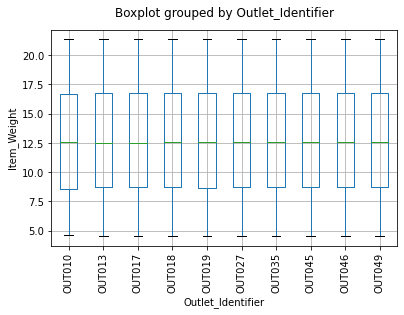

In [168]:
# create a mask of the missing data in Item_Weight
null_mask_weight = data['Item_Weight'].isnull()

# impute values
data.loc[null_mask_weight, 'Item_Weight'] = data.loc[null_mask_weight, 'Item_Identifier'].apply(lambda x: item_av_weight.loc[x])
ax = data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)
ax.set_ylabel('Item_Weight')
ax.set_title('')

    And now we can see that the values we have chosen to replace the missing weights are reasonable as the boxplot of the affected outlets now follows the same pattern as the others.

### Outlet_Size
    It could be reasonable to impute the missing values of Outlet_size by the mode size for each Outlet_Type.
    Let's have a look at the mode size for each Outlet_Type.

In [169]:
from scipy.stats import mode

# replace all nan values with 'unknown', because the mode function of stats can not compare a float (NaN) and a string
data['Outlet_Size'] = data['Outlet_Size'].fillna('unknown')

# mode size per Outlet_Type
outlet_type_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


#### Grocery stores could be considered to be smaller than the supermarkets, so we could replace the 'unknown' in the pivot table above by 'small', but let's check the the sales in each Outlet_Type to see if we can confirm this.

Text(0.5, 1.0, '')

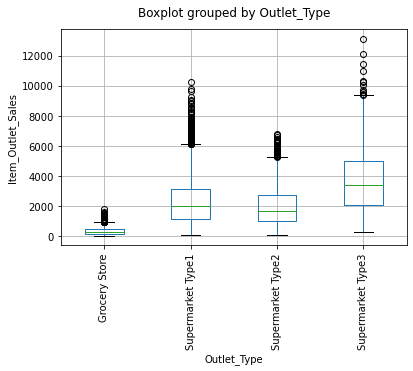

In [170]:
# sales per Outlet_Type
ax = data.boxplot(column='Item_Outlet_Sales', by='Outlet_Type', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket Type1'),
 Text(2, 0, 'Supermarket Type2'),
 Text(3, 0, 'Supermarket Type3')]

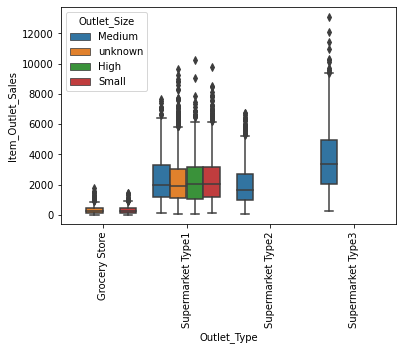

In [171]:
import seaborn as sns

ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#ax = data.boxplot(column='Item_Outlet_Sales', by=['Outlet_Type', 'Outlet_Size'], rot=90)
#ax.set_ylabel('Item_Outlet_Sales')
#ax.set_title('')

#### Grocery stores report far fewer sales than the other Outlet_Types and they have Outlet_Size values that are either 'small' or 'unknown'. Therefore we can reasonably replace the mode value of Grocery Stores with 'small' and impute the missing values of Outlet_Size with the mode value for each Outlet_Type. To check we have done this correctly, we can visualise the Item_Outlet_Sales per Outlet_Identifier.

#### Also, we have to note that Type 2 stores are all medium and Type 3 are also all medium size. Type 1 stores have all sizes, which all have similar sales.

Text(0.5, 1.0, '')

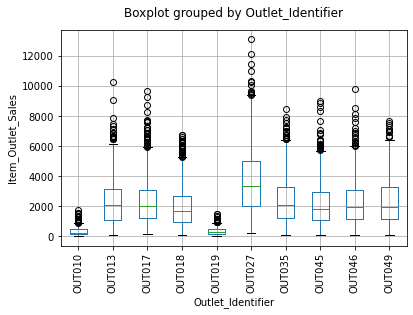

In [172]:
# sales per Outlet_Identifier
ax = data.boxplot(column='Item_Outlet_Sales', by='Outlet_Identifier', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

#### OUT010 and OUT019 seem to be of size 'small'.

In [173]:
# print Outlet_Type of OUT010 and Out019
outlet_identifier_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))
outlet_identifier_mode_size

,Outlet_Size
Outlet_Identifier,
OUT010,unknown
OUT013,High
OUT017,unknown
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,unknown
OUT046,Small


#### So OUT010 is unknown; after imputing missing values it should be 'small'.

In [174]:
# replace the Outlet_Size of the Grocery Store in the pivot table with small
outlet_type_mode_size.loc['Grocery Store'] = 'Small'
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [175]:
# create a mask of the missing data in Item_Weight
null_mask_size = data['Outlet_Size']=='unknown'

# impute values
data.loc[null_mask_size, 'Outlet_Size'] = data.loc[null_mask_size, 'Outlet_Type'].apply(lambda x: outlet_type_mode_size.loc[x])

# check no missing values
print(data['Outlet_Size'].head(10))
print(data.info())

0    Medium
1    Medium
2    Medium
3     Small
4      High
5    Medium
6      High
7    Medium
8     Small
9     Small
Name: Outlet_Size, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_

In [176]:
# print Outlet_Type of OUT010 and Out019
outlet_identifier_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:mode(x).mode[0]))
outlet_identifier_mode_size

,Outlet_Size
Outlet_Identifier,
OUT010,Small
OUT013,High
OUT017,Small
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,Small
OUT046,Small


#### It is reasonable that OUT017 and OUT045 are imputed with small because their mode Outlet_Type is Supermarket Type 1 which has mode Outlet_Size small.

### Min value of Item_Visibility
#### The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.

#### We want to replace the 0 values for the mean visibility value of that product in each store.

In [177]:
# check how many entries have 0
data['Item_Visibility'].value_counts().head()

0.000000    879
0.076792      3
0.077169      3
0.076841      3
0.076975      3
Name: Item_Visibility, dtype: int64

#### 879 out of 14204 is a lot so we replace the 0 values for NAN values so the mean value is not affected.

In [178]:
# visual check that the 0 values in the firs 10 entries have been replaced
data['Item_Visibility'] = data['Item_Visibility'].replace({0:np.nan})

#### Check the visibility for each Item_Type in each Outlet_Type.

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

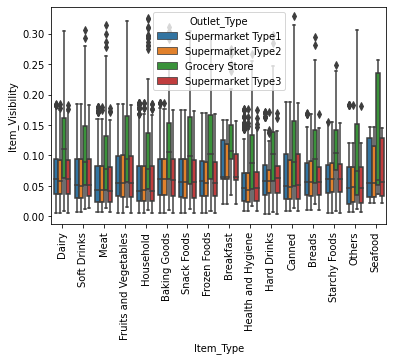

In [179]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [180]:
data['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3         NaN
4         NaN
5         NaN
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

#### The Item_Visibility for each Item_Type seems to be very similar for Type 1, 2 and 3 supermarkets and that is lower than for Grocery Sotres; in other words, buying in Grocery Stores is more expensive than in Supermarkets. So we impute missing values for each Item_Type in each Outlet_Type.

In [181]:
# pivot table with the mean values that will be used to replace the nan values
table = data.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [182]:
# replace the nan values
# define function that returns the mean values
def find_mean(x):
    return table.loc[x['Item_Type'], x['Outlet_Type']]

# replace missing values in loan_amount with median values
data['Item_Visibility'].fillna(data[data['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

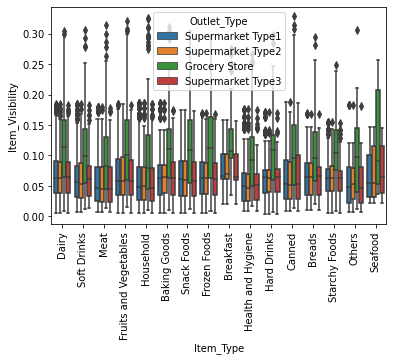

In [183]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [184]:
data['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3    0.114820
4    0.057774
5    0.068206
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

In [185]:
# Combine Low Fat, low fat and LF to Low Fat and reg and Regular to Regular

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
data['Item_Fat_Content'].head(5)

0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object

In [186]:
print('\nFrequency of Categories for variable Item_Fat_Content')
print(data['Item_Fat_Content'].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


# Feature Engineering
### Convert the Outlet_Establishment_Years into how old the establishments are

In [187]:
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Age'].head(5)

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Age, dtype: int64

In [188]:
data['Outlet_Age'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Age, dtype: float64

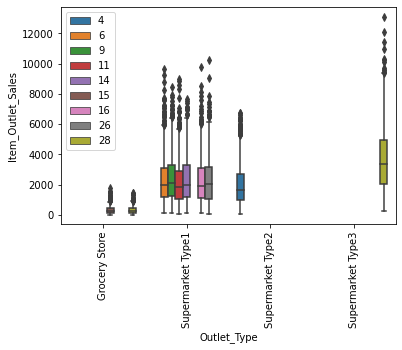

In [189]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Age', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='upper left')

#### Supermarket type 3 is the oldest, having been established 28 years ago. Type 1 have been build at different times, Type 2 is the newest. Grocery stores are relativiely old.

#### Create broader category for type of item
#### Notice the Item_Identifiers all start with letters. Let's see what they are and what they mean.

In [190]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:3]
data['Item_Type_Category'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

#### These seem to stand for Food, Drink and Non-Consumable. So rename them to be more intuitive.

In [191]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:2]
data['Item_Type_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [192]:
data['Item_Type_Category'] = data['Item_Type_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
data['Item_Type_Category'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_Type_Category, dtype: int64

### Change value of the 'Item_Fat_Content' of the items that are non-consumables.
#### Non-consumables do not have a fat content.

In [193]:
data.loc[data['Item_Type_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### Make a new category for items that reflect their sales - very high, high, medium, low.
#### Recall that there are more Item_MRP than Item_Identifier, indicating that different stores have different Item_MRP. We can visualise the Item_RMP grouped by the Item_Type and Outlet_Type

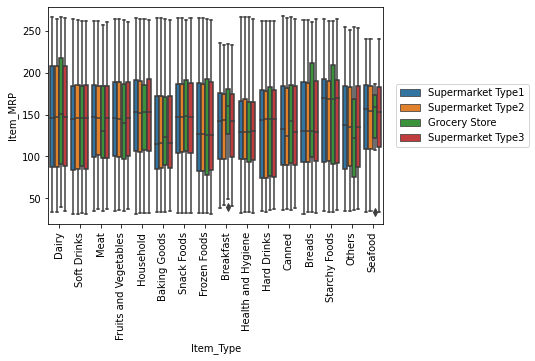

In [194]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

#### All the Item_Types seems to have a similar average Item_MRP accross the Outlet_Types. So we do not need to consider different Item_MRP per Outlet_Type.

#### Now we can have a look at the distribution of all Item_MRP.

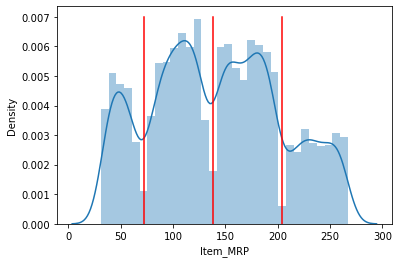

In [195]:
ax = sns.distplot(data['Item_MRP'])
x1=72
x2=138
x3=204
ax.plot([x1, x1],[0, 0.007], color='r')
ax.plot([x2, x2],[0, 0.007],color='r')
ax.plot([x3, x3],[0, 0.007],color='r')


#### The Item_MRP clearly shows there are 4 different price categories. So we define them to be 'Low', 'Medium', 'High', 'Very High'.

In [196]:
def price_cat(x):
    if x <= x1:
        return 'Low'
    elif (x > x1) & (x <= x2):
        return 'Medium'
    elif (x > x2) & (x <= x3):
        return 'High'
    else:
        return 'Very High'

data['Item_MRP_Category'] = data['Item_MRP']
data['Item_MRP_Category'] = data['Item_MRP_Category'].apply(price_cat)
data['Item_MRP_Category'].value_counts()

High         4934
Medium       4659
Very High    2400
Low          2211
Name: Item_MRP_Category, dtype: int64

# Data Visualisation

### Numerical data


In [197]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.793380,0.070270,141.004977,1997.830681,2181.288914,15.169319
std,4.651716,0.048750,62.086938,8.371664,1706.499616,8.371664
min,4.555000,0.003575,31.290000,1985.000000,33.290000,4.000000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400,9.000000
50%,12.600000,0.060322,142.247000,1999.000000,1794.331000,14.000000
75%,16.750000,0.095967,185.855600,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


### Item_MRP
#### As we have seen previously, the Item_MRP is clearly divided into 4 categories. Now, let's plot the Item_MRP grouped by the Outlet_Type and Outle_Size.


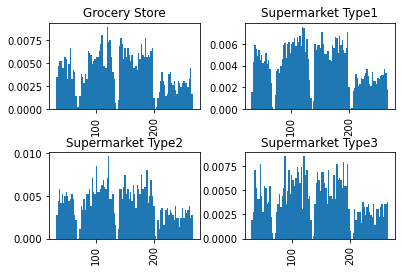

In [198]:

ax = data.hist(column='Item_MRP' , by='Outlet_Type', bins=100, density=True)

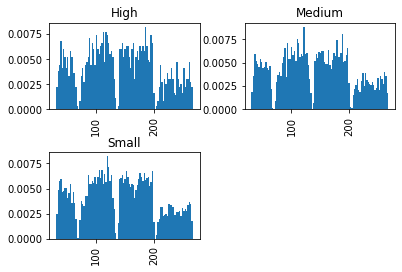

In [199]:
ax = data.hist(column='Item_MRP' , by='Outlet_Size', bins=100, density=True)

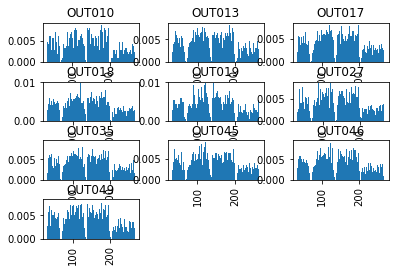

In [200]:
ax = data.hist(column='Item_MRP' , by='Outlet_Identifier', bins=100, density=True)

#### So the different categories of Item_MRP are well represented accross all outlets.

#### Explore how Item_MRP depends on Outlet_Type:

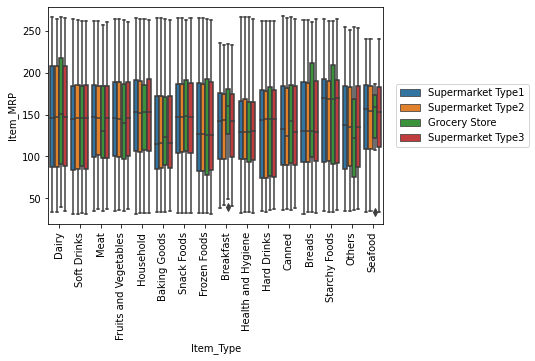

In [201]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


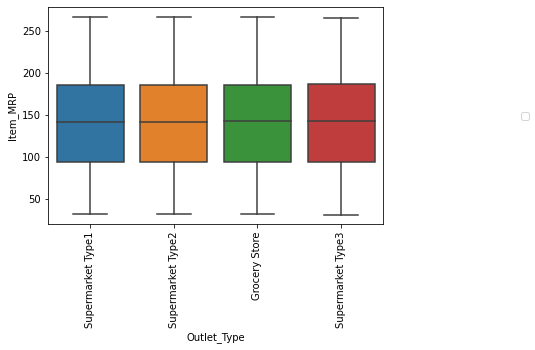

In [202]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_MRP')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

#### Item_MRP does not differ depending on Outlet_Type.
### Item_Outlet_Sales

No handles with labels found to put in legend.
No handles with labels found to put in legend.


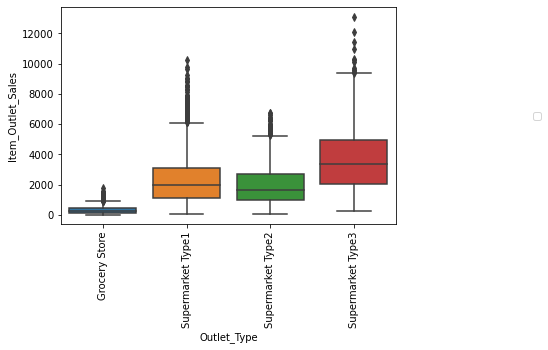

In [203]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

#### Item_Outlet_Sales are very low for Grocery Stores, even though we saw above the Item_MRP is the same for all Outlet_Types.

#### Let's Explore if this is because of the Outlet_Size.

[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket Type1'),
 Text(2, 0, 'Supermarket Type2'),
 Text(3, 0, 'Supermarket Type3')]

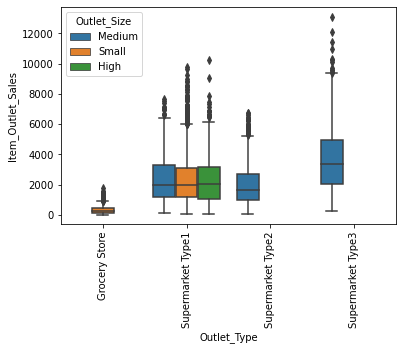

In [204]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Size
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### No, it is just about the Grocery Stores. Let's explore how they Item_Types differ depending on Outlet_Type.

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

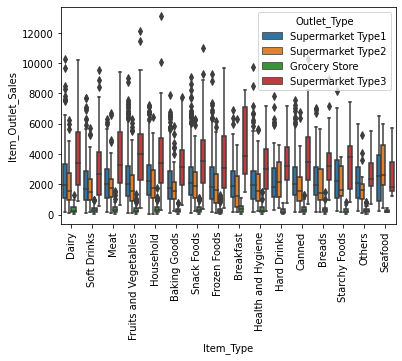

In [205]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### Grocery stores just sell a smaller number of everything.

[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket Type1'),
 Text(2, 0, 'Supermarket Type2'),
 Text(3, 0, 'Supermarket Type3')]

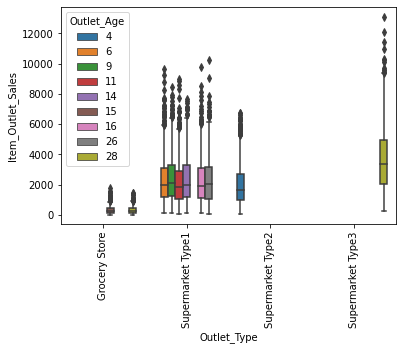

In [206]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Age
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Age', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### Interestingly, type 3 supermarkets perform the best in pure sales (Item_Outlet_Sales), even though they are the oldest and they are also medium sized.

#### Now let's explore how each store (Outlet_Identifier) performs in sales:

[Text(0, 0, 'OUT049'),
 Text(1, 0, 'OUT018'),
 Text(2, 0, 'OUT010'),
 Text(3, 0, 'OUT013'),
 Text(4, 0, 'OUT027'),
 Text(5, 0, 'OUT045'),
 Text(6, 0, 'OUT017'),
 Text(7, 0, 'OUT046'),
 Text(8, 0, 'OUT035'),
 Text(9, 0, 'OUT019')]

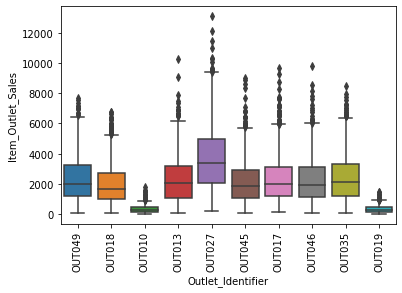

In [207]:
# Item_Outlet_Sales per Outlet_Identifier
ax = sns.boxplot(data=data, x='Outlet_Identifier', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [208]:
for i in data['Outlet_Identifier'].unique():
    otype = data[data['Outlet_Identifier']==i]['Outlet_Type'].unique()
    osize = data[data['Outlet_Identifier']==i]['Outlet_Size'].unique()
    print('Outlet_Identifier: {}, Outlet_Type(s): {}, Outlet_Size: {}'.format(i, otype, osize))

Outlet_Identifier: OUT049, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT018, Outlet_Type(s): ['Supermarket Type2'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT010, Outlet_Type(s): ['Grocery Store'], Outlet_Size: ['Small']
Outlet_Identifier: OUT013, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['High']
Outlet_Identifier: OUT027, Outlet_Type(s): ['Supermarket Type3'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT045, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT017, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT046, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT035, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT019, Outlet_Type(s): ['Grocery Store'], Outlet_Size: ['Small']


#### Again, this confirms that low sales is due to the outlet being a grocery store and not because the size is small.

### Item_Number_Sales
#### Given that the Item_MRP does not change significantly accross the stores, it might be more useful to analyse the number of items sold, not the Item_Outlet_Sales. The Item_Outlet_Sales is the number of items sold times the Item_MRP. So let's make a new variable with the number of items sold (by dividing the Item_Outlet_Sales by Item_MRP).

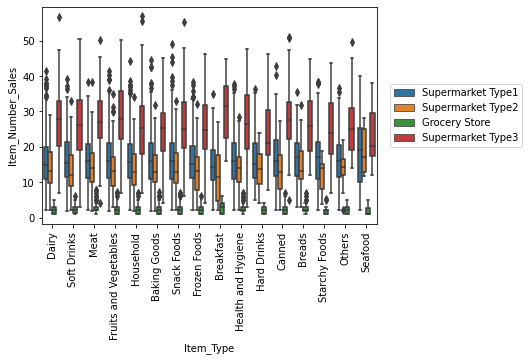

In [209]:
data['Item_Number_Sales'] = data['Item_Outlet_Sales']/data['Item_MRP']


ax = sns.boxplot(data=data, x='Item_Type', y='Item_Number_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


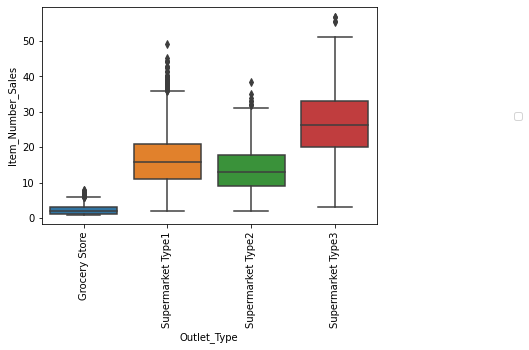

In [210]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Number_Sales', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket Type1'),
 Text(2, 0, 'Supermarket Type2'),
 Text(3, 0, 'Supermarket Type3')]

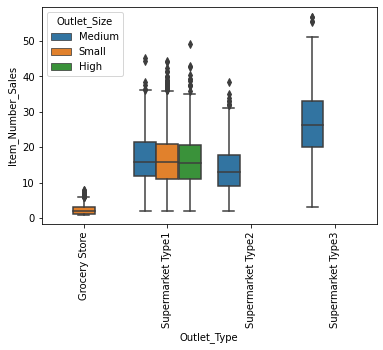

In [211]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Size
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Number_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'OUT049'),
 Text(1, 0, 'OUT018'),
 Text(2, 0, 'OUT010'),
 Text(3, 0, 'OUT013'),
 Text(4, 0, 'OUT027'),
 Text(5, 0, 'OUT045'),
 Text(6, 0, 'OUT017'),
 Text(7, 0, 'OUT046'),
 Text(8, 0, 'OUT035'),
 Text(9, 0, 'OUT019')]

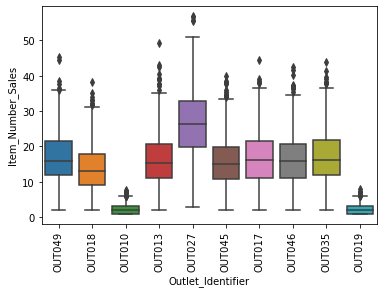

In [212]:
# Item_Outlet_Sales per Outlet_Identifier
ax = sns.boxplot(data=data, x='Outlet_Identifier', y='Item_Number_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### So it is clear that in pure numbers Grocery Stores sell less.

#### Item_outlet_sales and Item_MRP vs Item_Visibility

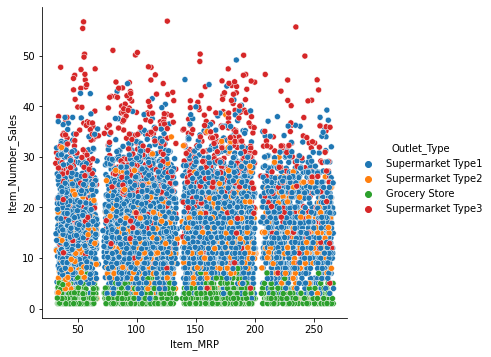

In [213]:
sns.pairplot(data=data, x_vars='Item_MRP', y_vars='Item_Number_Sales', hue='Outlet_Type', size=5)

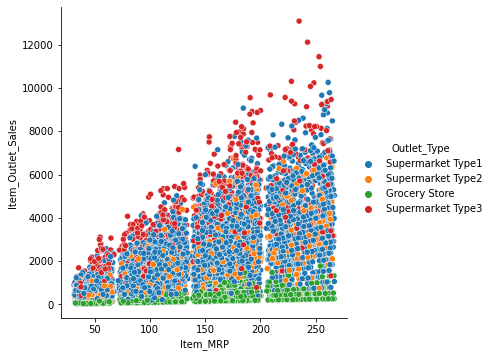

In [214]:
sns.pairplot(data=data, x_vars='Item_MRP', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)

In [215]:
cor1 = data['Item_MRP'].corr(data['Item_Outlet_Sales'])
cor2 = data['Item_MRP'].corr(data['Item_Number_Sales'])
print('Correlation between Item_MRP and Item_Outlet_Sales: {}'.format(cor1))
print('Correlation between Item_MRP and Item_Number_Sales: {}'.format(cor2))

Correlation between Item_MRP and Item_Outlet_Sales: 0.5675744466569194
Correlation between Item_MRP and Item_Number_Sales: 0.011143527012324832


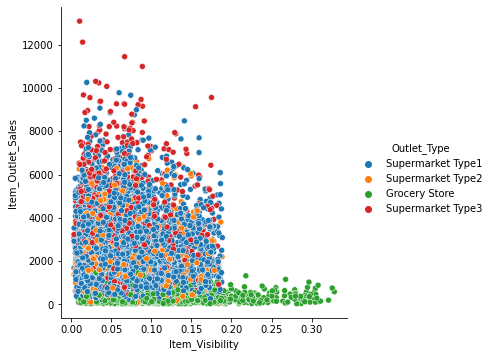

In [216]:
sns.pairplot(data=data, x_vars='Item_Visibility', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)

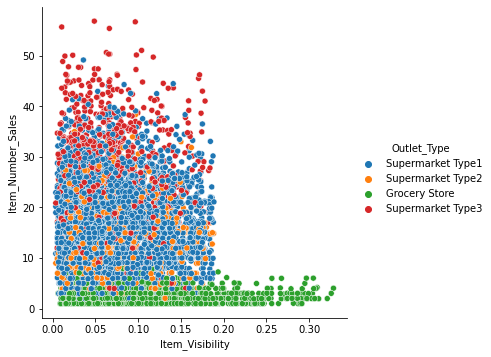

In [217]:
sns.pairplot(data=data, x_vars='Item_Visibility', y_vars='Item_Number_Sales', hue='Outlet_Type', size=5)

In [218]:
cor1 = data['Item_Visibility'].corr(data['Item_Outlet_Sales'])
cor2 = data['Item_Visibility'].corr(data['Item_Number_Sales'])
print('Correlation between Item_Visibility and Item_Outlet_Sales: {}'.format(cor1))
print('Correlation between Item_Visibility and Item_Number_Sales: {}'.format(cor2))

Correlation between Item_Visibility and Item_Outlet_Sales: -0.1407617468766223
Correlation between Item_Visibility and Item_Number_Sales: -0.17440844918045087


#### There is a positive correlation between Item_MRP and Item_Outlet_Sales and a negative correlation between Item_Outlet_Sales and visibility.

#### There is no correlation Item_MRP and Item_Number_Sales and there is a negative correlation between Item_Number_Sales and visibility.

#### Questions that arrise:

    1.Why do Gorcery Stores have items with Item_Visibility at heights that do not appear at other outlet_types?
# Data Visualization of Categorical Data

In [219]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# exclude the id and source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Frequency of Categories for variable Outlet_Size

## Numerical and One-Hot Coding of Categorical Variables
### Some of the models we will use require only numerical data.

In [220]:
# drop the Outlet_Establishment_Year and Item_Number_Sales columns from the data
data = data.drop(['Outlet_Establishment_Year','Item_Number_Sales'], axis=1)
data.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Outlet_Age                int64
Item_Type_Category       object
Item_MRP_Category        object
dtype: object

In [221]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Type_Category', 'Item_MRP_Category'],
      dtype='object')

# Skewness

In [222]:
data.skew()

Item_Weight          0.100417
Item_Visibility      1.298627
Item_MRP             0.130728
Item_Outlet_Sales    1.177531
Outlet_Age           0.396465
dtype: float64

#### We can observe from the above boxplots that there is some outliers in Item_Visibility

In [223]:
data['Item_Visibility']=np.sqrt(data['Item_Visibility'])
data.skew()

Item_Weight          0.100417
Item_Visibility      0.407396
Item_MRP             0.130728
Item_Outlet_Sales    1.177531
Outlet_Age           0.396465
dtype: float64

#### We have now reducted the sqewness as much as possible

In [224]:
from copy import deepcopy
data_copy = deepcopy(data)

### Numerical Coding of Categorical Data

In [225]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# create variables to keep the information of the Outlet_Identifiers
data_copy['Outlet'] = le.fit_transform(data_copy['Outlet_Identifier'])

# convert all categories of nominal variables into numeric types
var_mod = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type',
           'Outlet_Size', 'Outlet_Type', 'Item_Type_Category', 
           'Item_MRP_Category', 'Outlet']

le = LabelEncoder()

for i in var_mod:
    data_copy[i] = le.fit_transform(data_copy[i])

In [226]:
data_copy2 = deepcopy(data_copy)

## One hot coding of categorical variables

In [227]:
# one-hot coding:  creating dummy variables, one for each category of a categorical variable 
data_copy2 = pd.get_dummies(data_copy2, columns=['Item_Fat_Content', 'Item_Type', 
                                     'Outlet_Location_Type',
                                     'Outlet_Size', 'Outlet_Type', 
                                     'Item_Type_Category', 
                                     'Item_MRP_Category', 'Outlet'])

In [228]:
data_copy2.dtypes

Item_Identifier            object
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Outlet_Identifier          object
Item_Outlet_Sales         float64
Outlet_Age                  int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Item_Fat_Content_2          uint8
Item_Type_0                 uint8
Item_Type_1                 uint8
Item_Type_2                 uint8
Item_Type_3                 uint8
Item_Type_4                 uint8
Item_Type_5                 uint8
Item_Type_6                 uint8
Item_Type_7                 uint8
Item_Type_8                 uint8
Item_Type_9                 uint8
Item_Type_10                uint8
Item_Type_11                uint8
Item_Type_12                uint8
Item_Type_13                uint8
Item_Type_14                uint8
Item_Type_15                uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Size_0 

In [229]:
data_copy2.columns.shape

(53,)

In [230]:
data_copy.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_Type                 int32
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_Type               int32
Item_Outlet_Sales       float64
Outlet_Age                int64
Item_Type_Category        int32
Item_MRP_Category         int32
Outlet                    int64
dtype: object

In [231]:
data.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Outlet_Age                int64
Item_Type_Category       object
Item_MRP_Category        object
dtype: object

#### One-hot encoding of the factor variables leaves us with 56 predictors.

### Standardisation of numerical data

In [232]:
data_copy3 = deepcopy(data_copy2)
data_copy3.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.126678,249.8092,OUT049,3735.1380,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.138846,48.2692,OUT018,443.4228,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.129461,141.6180,OUT049,2097.2700,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.338852,182.0950,OUT010,732.3800,15,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.240361,53.8614,OUT013,994.7052,26,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [239]:
data_copy3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Identifier         14204 non-null  int32  
 1   Item_Weight             14204 non-null  float64
 2   Item_Visibility         14204 non-null  float64
 3   Item_MRP                14204 non-null  float64
 4   Outlet_Identifier       14204 non-null  object 
 5   Item_Outlet_Sales       8523 non-null   float64
 6   Outlet_Age              14204 non-null  int64  
 7   Item_Fat_Content_0      14204 non-null  uint8  
 8   Item_Fat_Content_1      14204 non-null  uint8  
 9   Item_Fat_Content_2      14204 non-null  uint8  
 10  Item_Type_0             14204 non-null  uint8  
 11  Item_Type_1             14204 non-null  uint8  
 12  Item_Type_2             14204 non-null  uint8  
 13  Item_Type_3             14204 non-null  uint8  
 14  Item_Type_4             14204 non-null

In [272]:
from sklearn import preprocessing

# standardisation of numerical data
X = data_copy3[['Item_Visibility', 'Item_Weight', 'Outlet_Age']]
standardized_X = preprocessing.scale(X.values, with_mean=True)
data_copy3[['Item_Visibility', 'Item_Weight', 'Outlet_Age']] = standardized_X

# Split the Feature and the label variables

In [273]:
#x=data_copy3.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'], axis= 1)
#y=data_copy3['Item_Outlet_Sales']



KeyError: 'source'

# Model Building

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [260]:
data_copy.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Type_Category', 'Item_MRP_Category', 'Outlet'],
      dtype='object')

In [267]:
data_copy.replace([np.inf, -np.inf], np.nan, inplace=True)

#### Let us now use Random state to find the best accuracy score

In [270]:
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').